####  Run the Code Below to Import the Dataset

In [1]:
import multiprocessing as mp
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Helper_Code import *

#### Importing the Dataset

In [2]:
# Uploading the DataSet

DataFrames = UploadDataSet(base_directory="dataframes_list.pkl.gz")


##### Analysis using the Dataset

NOTE: 
1. DataFrames[$i$] $\rightarrow$ Zone $i+1$ , for $i = 0,...,799$ 
 
    *   DataFrames[800] $\rightarrow$ Zone 801  
    
    *   $801$ Zones: $800$ Timesteps and the Last $801$th zone is the Average of all the $800$ Zones

3. There are 150 points along X  

    There are 120 points along Y  

    Overall, The mesh size is 150x120  

    $\implies 18000$ datapoints

    *   $ x \in \{0.314097, 0.942293, 1.53559, ...., 87.7361  , 88.3293  , 88.9574\} $ :: Uniformly Spaced Points ( units: mm)
    *   $ y \in \{33.0326  ,  32.4765  ,  31.9205, ..., -31.8858  , -32.4418  , -32.9978\}$ :: Uniformly Spaced Points (units: mm)

"
3. Parameters:  

        'X', 'Y', 'U', 'V', 'Ux', Uy', 'Vx', 'Vy', 'vor', 'Umean', 'Vmean', 'Urms', 'Vrms', 'ufluc', 'wfluc'


##### NOTE: The 'wfluc' here is 'vfluc'

In [16]:
i = 800#np.random.randint(801)
print("Time Stamp: "+str(i))

DataFrames[i]

Time Stamp: 800


,X,Y,U,V,Ux,Uy,Vx,Vy,vor,Umean,Vmean,Urms,Vrms,ufluc,wfluc,V16,V17
0,0.314097,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.73198,0.029995,0.537474,0.151676,-3.73198,-0.029995,450.314,0.0
1,0.942293,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74550,0.033352,0.531254,0.148314,-3.74550,-0.033352,450.942,0.0
2,1.535590,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74843,0.031688,0.532074,0.148811,-3.74843,-0.031688,451.536,0.0
3,2.128890,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74622,0.029415,0.536284,0.157544,-3.74622,-0.029415,452.129,0.0
4,2.722180,33.0326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.74620,0.030266,0.540452,0.162781,-3.74620,-0.030266,452.722,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,86.549700,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.28663,0.026822,0.654904,0.219418,-3.28663,-0.026822,536.550,0.0
17996,87.142900,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.26842,0.021879,0.646911,0.216320,-3.26842,-0.021879,537.143,0.0
17997,87.736100,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.26372,0.019525,0.647714,0.217231,-3.26372,-0.019525,537.736,0.0
17998,88.329300,-32.9978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25447,0.015776,0.650972,0.218226,-3.25447,-0.015776,538.329,0.0


In [67]:
del(i)

### Visualizing the Mesh

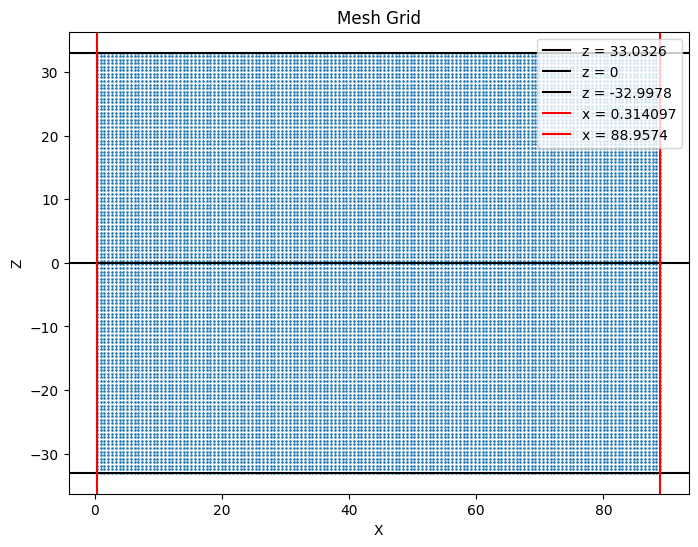

In [4]:
MeshViz(DataFrames=DataFrames)

### Creating Time Series of Various Parameters for any (x,y) location

In [69]:
# Provide the x and y
## NOTE x = {0.314097, 0.942293, 1.53559, ...., 87.7361  , 88.3293  , 88.9574}
## NOTE y = {33.0326  ,  32.4765  ,  31.9205, ..., -31.8858  , -32.4418  , -32.9978}

x = np.random.randint(low = 0, high = 90)
y = np.random.randint(low = -33, high = 34)

print(f"x={x},y={y}")

x=0,y=19


In [70]:
# Creating the Time Series for a 'VarName' in the Dataset !
VarName = 'ufluc'

pts, TS_var = TimeSeries_Generator(DataFrames, VarName, (x,y))

In [71]:
TS_var

,ufluc
0,-0.264709
1,-0.173889
2,-0.167884
3,-0.242543
4,-0.233978
...,...
795,0.301026
796,0.375122
797,0.625247
798,0.860407


#### Checking for the Stationarity of the Data :

In [72]:
adf_test(TS_var, title = f"{VarName}")

Augmented Dickey-Fuller Test: ufluc

ADF test statistic     -7.546702e+00
p-value                 3.269148e-11
# lags used             7.000000e+00
# observations          7.920000e+02
critical value (1%)    -3.438634e+00
critical value (5%)    -2.865196e+00
critical value (10%)   -2.568717e+00


Strong evidence against the null hypothesis (pval <= 0.05)
Reject the null hypothesis
Data has no unit root and is stationary


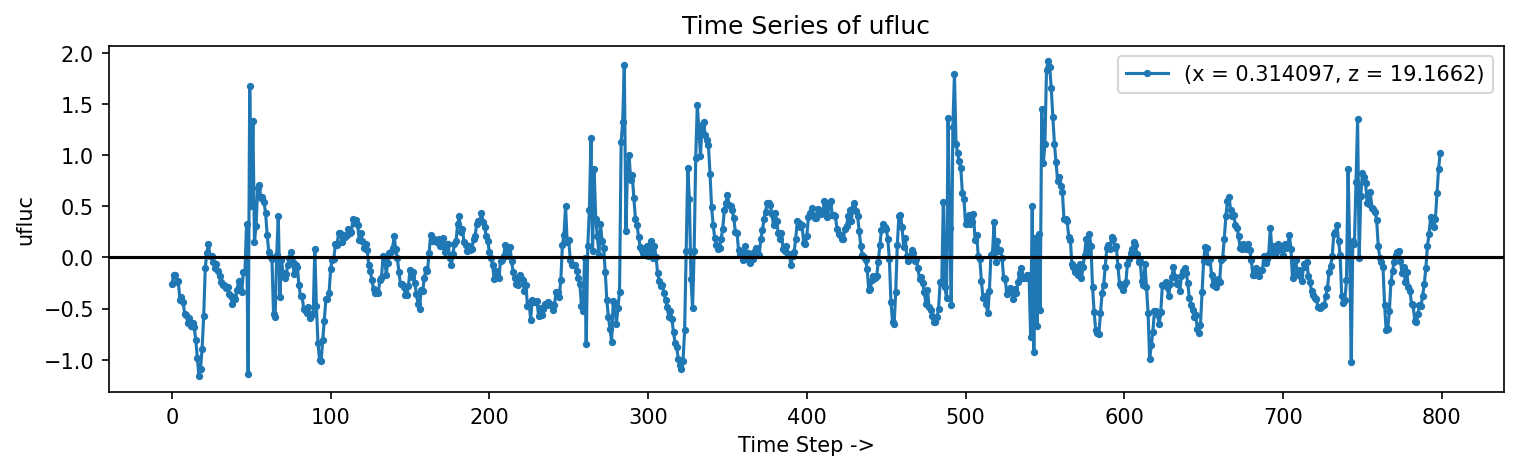

In [73]:
# Plot of the Time Series
plt.plot(TS_var, marker='.', markersize=5, linestyle='-', label=f"(x = {pts[0]}, z = {pts[1]})")

plt.axhline(y=0, color = 'k')

plt.gcf().set_size_inches(12, 3) 
plt.gcf().set_dpi(150)  # Set DPI for high quality


plt.title(f"Time Series of {VarName}")
plt.ylabel(f"{VarName}")
plt.xlabel("Time Step ->")
plt.legend()

plt.show()

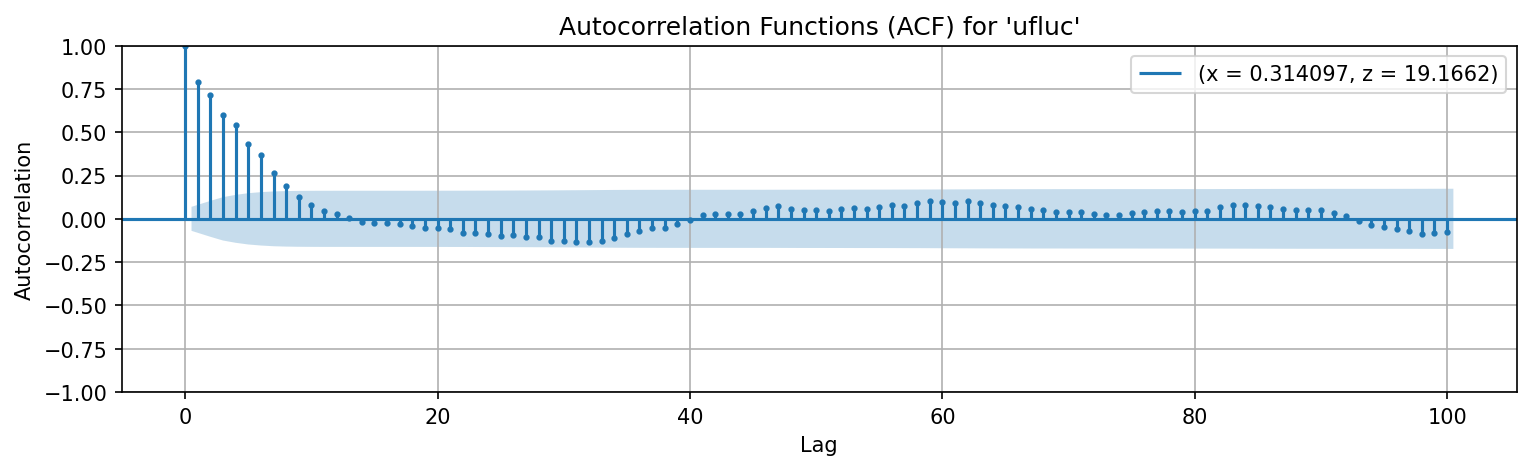

In [74]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot Partial Autocorrelation Function (PACF)
fig, ax = plt.subplots(figsize=(12, 3))
plt.gcf().set_dpi(150)
plot_acf(TS_var[VarName], lags=100, ax=ax, markersize=2)

plt.title(f"Autocorrelation Functions (ACF) for '{VarName}'")
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend([f"(x = {pts[0]}, z = {pts[1]})"], loc='upper right')

plt.grid(True)
plt.show()

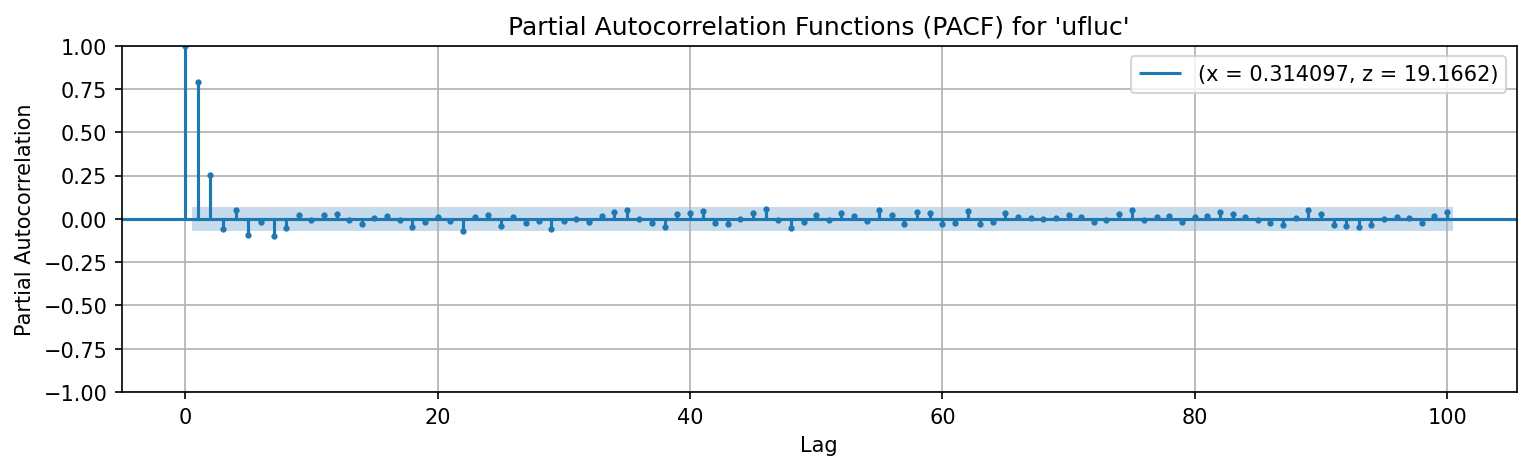

In [75]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Plot Partial Autocorrelation Function (PACF)
fig, ax = plt.subplots(figsize=(12, 3))
plt.gcf().set_dpi(150)
plot_pacf(TS_var[VarName], lags=100, ax=ax, markersize=2)

plt.title(f"Partial Autocorrelation Functions (PACF) for '{VarName}'")
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.legend([f"(x = {pts[0]}, z = {pts[1]})"], loc='upper right')

plt.grid(True)
plt.show()


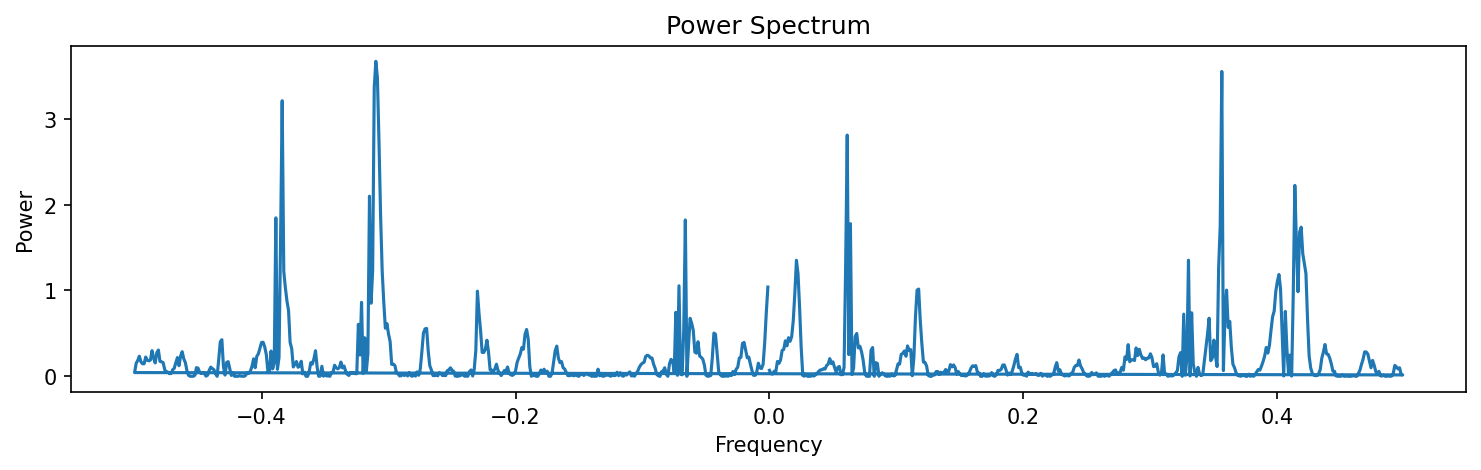

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Assume 'time_series' is your time-domain data.
time_series = TS_var  # Your data here

# Compute the Fast Fourier Transform (FFT)
fft_result = np.fft.fft(time_series)

# Get the power spectrum (square of the absolute value of the FFT result)
power_spectrum = np.abs(fft_result)**2

# Generate frequency bins corresponding to the FFT results
frequencies = np.fft.fftfreq(len(time_series))

plt.gcf().set_size_inches(12, 3) 
plt.gcf().set_dpi(150)  # Set DPI for high quality

# Plot the spectrum
plt.plot(frequencies, power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.title('Power Spectrum')
plt.show()
